In [1]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

import json, pickle
from tqdm import tqdm
import sys, os, pdb
import pandas as pd

# from src.data import ECoG_Data
# from src.fold_data import Fold_Data_Container
import src.manifold_u as mu
import importlib
importlib.reload(mu)

import fig_utils as figu

plt.style.use(['science', 'retro'])
sns.set_style("ticks")

In [2]:
movement_colors, day_colors, participant_colors, exp_class_colors, exp_participant_colors, freq_colors = mu.get_all_colors()

## Naturalistic Data First

In [3]:
filepath = '/home/zsteineh/research_projects/NaturalisticNeuralManifolds/experiment_params/'
file_name = 'exp_params_nat_pca.json'
try:
    json_filename = filepath + file_name
except IndexError:
    raise SystemExit(f"Usage: {sys.argv[0]} <json file of experiment parameters>")
with open(json_filename) as f:
    exp_params = json.load(f)
print(exp_params['comment'])

Param file for running PCA pipeline on naturalistic data


In [4]:
freq_bands = exp_params["freq_bands"]
class_dict = exp_params["class_dict"]
class_dict = {int(cur_key): val for cur_key, val in class_dict.items()}
class_color = exp_params["class_color"]
class_color = {int(cur_key): val for cur_key, val in class_color.items()}

proj_mat_sp = exp_params["sp"] + exp_params["dataset"] + exp_params["experiment_folder"]

percent_threshold = 0.8
pats_ids_in = exp_params["pats_ids_in"]
days_tested = exp_params["test_day"]

In [5]:
all_sbjs_pca = []
for f, freq in enumerate(freq_bands):
    cur_pca = np.load(proj_mat_sp + freq + '_pca_objects.npy', allow_pickle=True)
    all_sbjs_pca.append(cur_pca)
all_sbjs_pca = np.array(all_sbjs_pca)
print(all_sbjs_pca.shape)

pca_manifolds_VAF = mu.extract_explained_var(
    class_dict, freq_bands, pats_ids_in, all_sbjs_pca
)
# remove rest data
pca_manifolds_VAF = pca_manifolds_VAF[:, :, :, 1:, :]
print(pca_manifolds_VAF.shape)

# get the mean and std of the VAF for each freq band
pca_manifolds_VAF_mean = np.nanmean(pca_manifolds_VAF, axis=(1,2,3))
print(pca_manifolds_VAF_mean.shape)
pca_manifolds_VAF_std = np.nanstd(pca_manifolds_VAF, axis=(1,2,3))
print(pca_manifolds_VAF_std.shape)

(6, 12, 5, 5)
(6, 12, 5, 4, 311)
(6, 311)
(6, 311)


### Cross Movements

In [6]:
cross_move_pas = pickle.load(open(proj_mat_sp + 'freq_cross_move_pas.pkl', 'rb'))
print(cross_move_pas.keys())

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


In [7]:
cross_move_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_move_nd_df.csv')
cross_move_nd_df

,Unnamed: 0,Frequency,Participant,Day,Movement Comparison,Neural Dissimilarity
0,0,LFO,P01,3,left vs down,0.108478
1,1,LFO,P01,3,left vs right,NaN
2,2,LFO,P01,3,left vs up,NaN
3,3,LFO,P01,3,down vs right,NaN
4,4,LFO,P01,3,down vs up,NaN
...,...,...,...,...,...,...
434155,72355,High Gamma,Null,Null,left vs right,0.799577
434156,72356,High Gamma,Null,Null,left vs up,0.788575
434157,72357,High Gamma,Null,Null,down vs right,0.799842
434158,72358,High Gamma,Null,Null,down vs up,0.787117


### Cross Days

In [8]:
cross_day_pas = pickle.load(open(proj_mat_sp + 'freq_cross_day_pas.pkl', 'rb'))
print(cross_day_pas.keys())

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


In [9]:
cross_day_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_day_nd_df.csv')
cross_day_nd_df

,Unnamed: 0,Frequency,Participant,Movement,Day Comparison,Neural Dissimilarity
0,0,LFO,P01,left,3 vs 4,0.259786
1,1,LFO,P01,left,3 vs 5,0.218220
2,2,LFO,P01,left,3 vs 6,0.187073
3,3,LFO,P01,left,3 vs 7,0.158584
4,4,LFO,P01,left,4 vs 5,0.176058
...,...,...,...,...,...,...
1670875,475,High Gamma,P12,up,4 vs 6,0.073670
1670876,476,High Gamma,P12,up,4 vs 7,0.056020
1670877,477,High Gamma,P12,up,5 vs 6,0.072051
1670878,478,High Gamma,P12,up,5 vs 7,0.053941


### Cross Participants

In [10]:
cross_pat_pas = pickle.load(open(proj_mat_sp + 'freq_cross_pat_pas.pkl', 'rb'))
print(cross_pat_pas.keys())

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


In [11]:
cross_pat_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_pat_nd_df.csv')
cross_pat_nd_df

,Unnamed: 0,Frequency,Movement,Participant Comparison,First Participant Day,Second Participant Day,Electrode Overlap,Neural Dissimilarity
0,0,LFO,left,P01 vs P02,3,3,0.438662,0.493537
1,1,LFO,left,P01 vs P02,3,4,0.438662,0.466339
2,2,LFO,left,P01 vs P02,3,5,0.438662,0.507696
3,3,LFO,left,P01 vs P02,3,6,0.438662,0.470691
4,4,LFO,left,P01 vs P02,3,7,0.438662,NaN
...,...,...,...,...,...,...,...,...
303595,6595,High Gamma,up,P11 vs P12,7,3,0.473318,0.309033
303596,6596,High Gamma,up,P11 vs P12,7,4,0.473318,0.299223
303597,6597,High Gamma,up,P11 vs P12,7,5,0.473318,0.311777
303598,6598,High Gamma,up,P11 vs P12,7,6,0.473318,0.294776


### Make the figure

0.7388512849327291
0.7295297760497623
0.7784360326554797


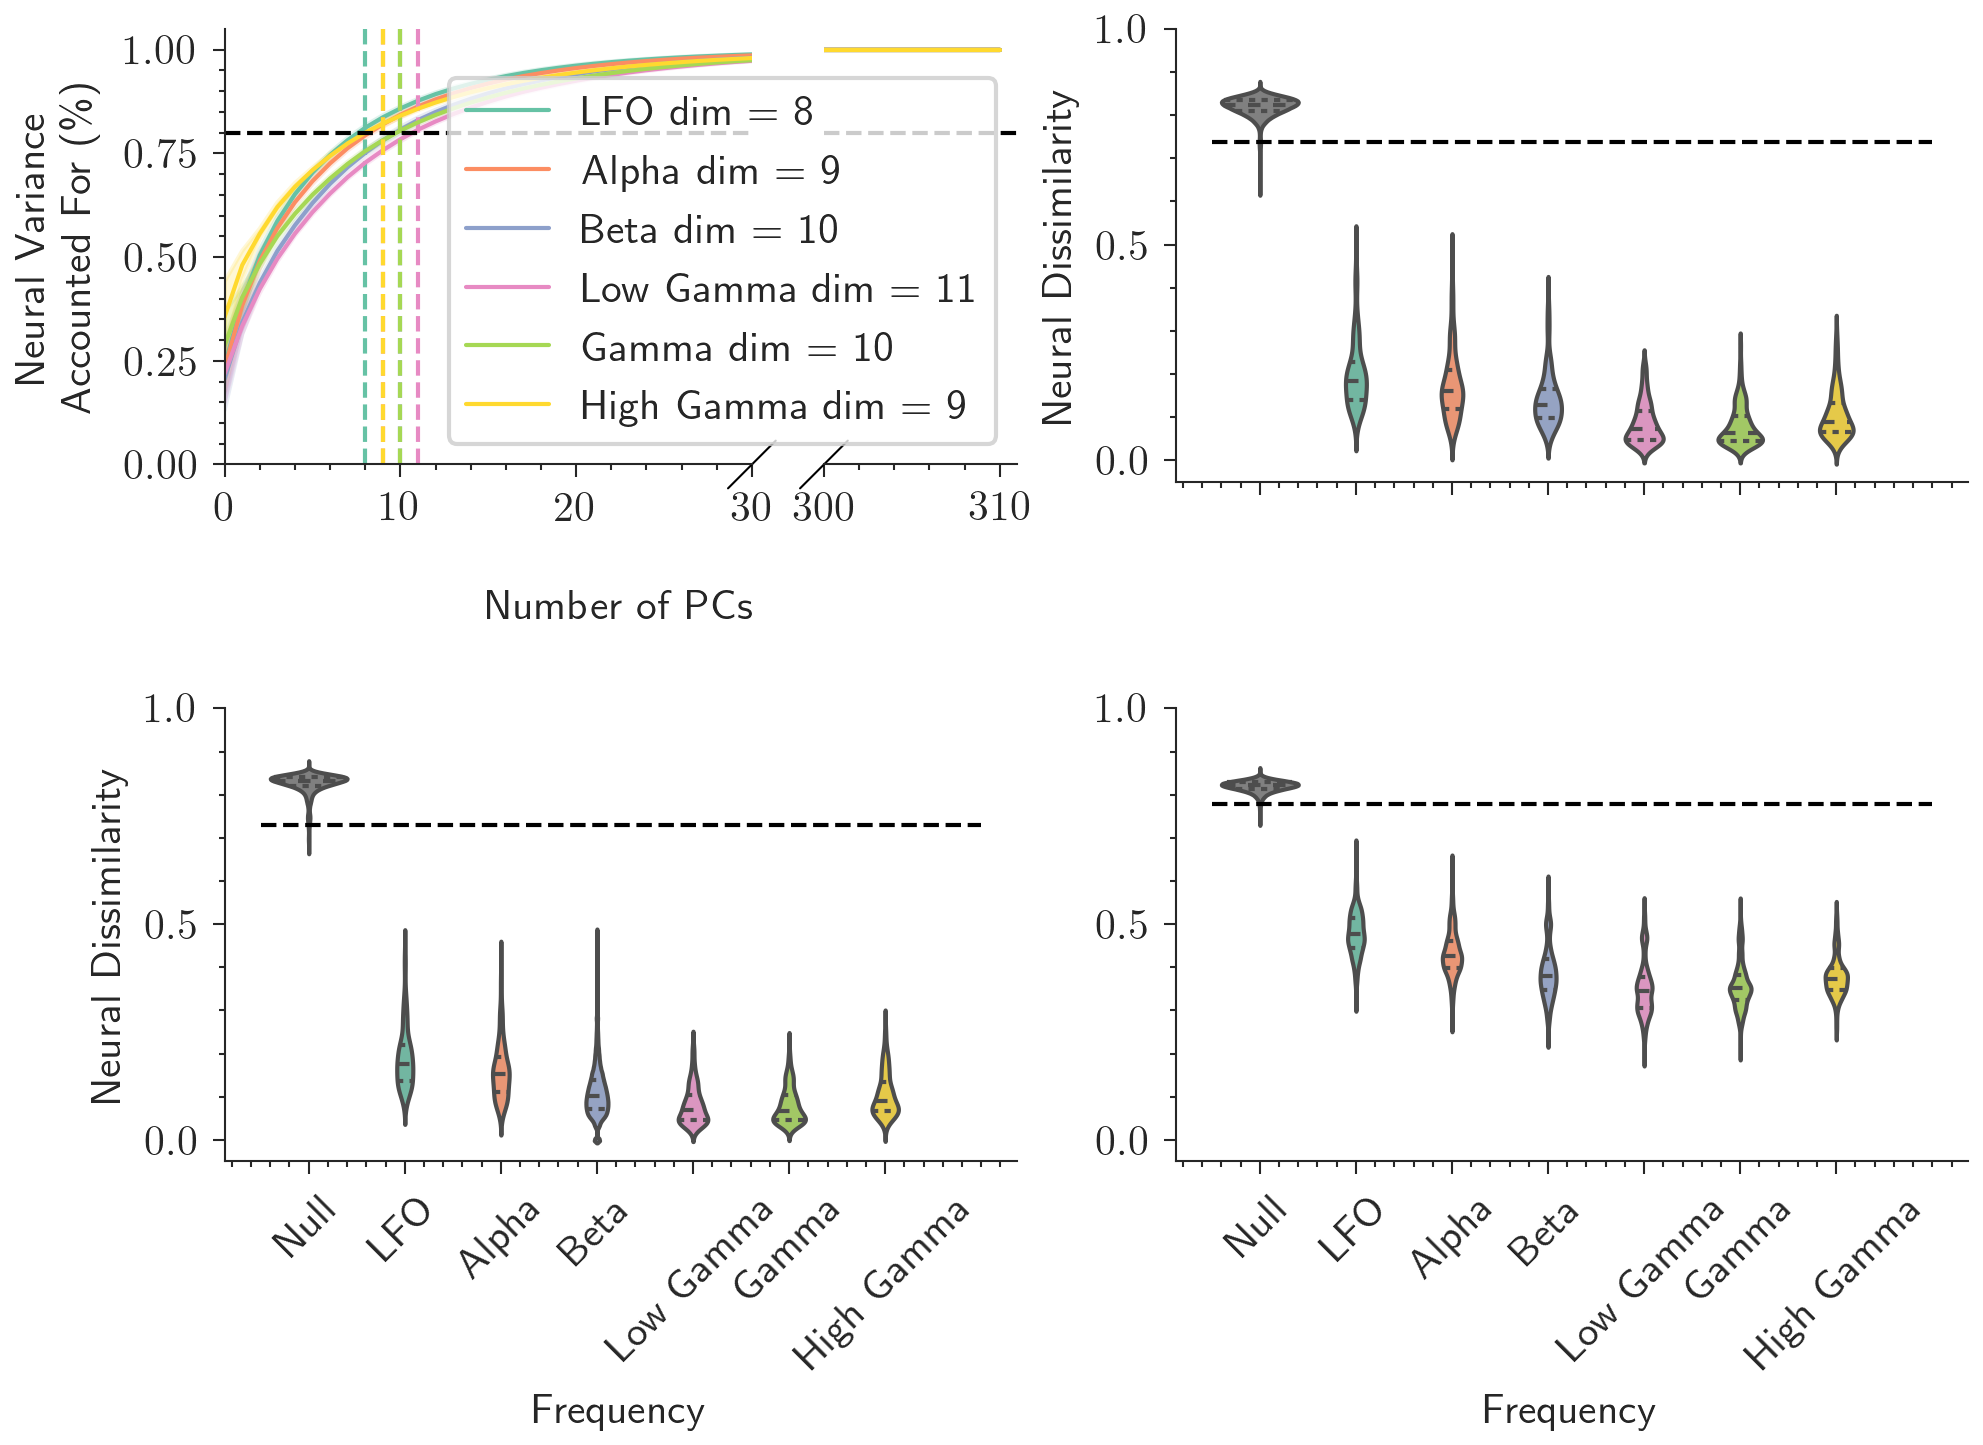

In [12]:
wspace = 0.2
hspace = 0.5
fig, orig_axes = plt.subplots(2, 2, figsize=(7.5, 5), dpi = 300)
plt.rcParams.update({"font.size": 10})
plt.subplots_adjust(wspace=wspace, hspace=hspace)
orig_axes[0,0].axis('off')
sns.despine()
# plt.tight_layout()

axes = GridSpec(2,2, figure=fig, wspace=wspace, hspace=hspace+0.1)

figu.subplot_VAF(pca_manifolds_VAF_mean, 
            pca_manifolds_VAF_std, 
            list(freq_bands.keys()), 
            "", 
            freq_colors, 
            axes[0,0],
            legend_loc=None)

order = ["Null"]
order.extend(freq_bands.keys())
null_inds = cross_move_nd_df[cross_move_nd_df["Participant"] == "Null"].index
cross_move_nd_df.loc[null_inds, "Frequency"] = "Null"
sigf_val = mu.calc_sumed_significance(cross_move_nd_df)
print(sigf_val)
figu.plot_neural_dissimilarity(orig_axes[0,1], 
                          cross_move_nd_df, 
                          sigf_val, 
                          order, 
                          freq_colors, 
                          x="Frequency", )
orig_axes[0,1].set_xticklabels([])
orig_axes[0,1].set_xlabel('')
orig_axes[0,1].set_yticks([0, 0.5, 1])

sigf_val = mu.calc_sumed_significance(cross_day_nd_df)
print(sigf_val)
figu.plot_neural_dissimilarity(orig_axes[1,0], 
                          cross_day_nd_df, 
                          sigf_val, 
                          order, 
                          freq_colors, 
                          x="Frequency",)
orig_axes[1,0].set_yticks([0, 0.5, 1])

sigf_val = mu.calc_sumed_significance(cross_pat_nd_df , null_col='Movement')
print(sigf_val)
figu.plot_neural_dissimilarity(orig_axes[1,1], 
                          cross_pat_nd_df, 
                          sigf_val, 
                          order, 
                          freq_colors, 
                          x="Frequency",)
orig_axes[1,1].set_yticks([0, 0.5, 1])
orig_axes[1,1].set_ylabel('')

plt.savefig('/home/zsteineh/research_projects/NaturalisticNeuralManifolds/figures/saved_figures/supplement_nat_freq.svg', bbox_inches='tight', format='svg')
plt.show()

In [13]:
print("CROSS MOVEMENT STATS")
print("All Freqs")
print("mean:", cross_move_nd_df[cross_move_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].mean())
print("std:", cross_move_nd_df[cross_move_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].std())
print()
for freq in freq_bands.keys():
    print(freq)
    print("mean:", cross_move_nd_df[cross_move_nd_df['Frequency'] == freq]['Neural Dissimilarity'].mean())
    print("std:", cross_move_nd_df[cross_move_nd_df['Frequency'] == freq]['Neural Dissimilarity'].std())
    print()

CROSS MOVEMENT STATS
All Freqs
mean: 0.13082051891481744
std: 0.07663922324621883

LFO
mean: 0.19852870400800762
std: 0.07831114797760816

Alpha


mean: 0.17359980982718204
std: 0.07783660171897969

Beta
mean: 0.14180972134162775
std: 0.06256044628213396

Low Gamma
mean: 0.08587999205630406
std: 0.047719204689454946

Gamma
mean: 0.07960205908663251
std: 0.045525068402492465

High Gamma
mean: 0.10550282716914966
std: 0.05497508501713027



In [14]:
print("CROSS DAY STATS")
print("All Freqs")
print("mean:", np.nanmean(cross_day_nd_df[cross_day_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].values))
print("std:", np.nanstd(cross_day_nd_df[cross_day_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].values))

print()
for freq in freq_bands.keys():
    print(freq)
    print("mean:", cross_day_nd_df[cross_day_nd_df['Frequency'] == freq]['Neural Dissimilarity'].mean())
    print("std:", cross_day_nd_df[cross_day_nd_df['Frequency'] == freq]['Neural Dissimilarity'].std())
    print()

CROSS DAY STATS
All Freqs
mean: 0.11124506753608376
std: 0.056375840740143235

LFO
mean: 0.18912508481332327
std: 0.06954499554117638

Alpha
mean: 0.159838561443135
std: 0.06585660500020958

Beta
mean: 0.11122247159644424
std: 0.056341246893301965

Low Gamma
mean: 0.07980433422865327
std: 0.04316284652485854

Gamma
mean: 0.07927905878747459
std: 0.0412688323347241

High Gamma
mean: 0.10464607701157898
std: 0.04956658409876661



In [15]:
print("CROSS PAT STATS")
print("All Freqs")
print("mean:", cross_pat_nd_df[cross_pat_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].mean())
print("std:", cross_pat_nd_df[cross_pat_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].std())
print()
for freq in freq_bands.keys():
    print(freq)
    print("mean:", cross_pat_nd_df[cross_pat_nd_df['Frequency'] == freq]['Neural Dissimilarity'].mean())
    print("std:", cross_pat_nd_df[cross_pat_nd_df['Frequency'] == freq]['Neural Dissimilarity'].std())
    print()

CROSS PAT STATS
All Freqs
mean: 0.39740252789789793
std: 0.07014897903919545

LFO
mean: 0.47789350114216883
std: 0.05056165610361974

Alpha
mean: 0.43115119208503927
std: 0.05139251462679114

Beta
mean: 0.38847691527908257
std: 0.06078493095361149

Low Gamma
mean: 0.35064471885631754
std: 0.06205590413470276

Gamma
mean: 0.358398294456723
std: 0.05389453214266272

High Gamma
mean: 0.377850545568055
std: 0.0457414765874493



# Experimental Data

In [16]:
filepath = '/home/zsteineh/research_projects/NaturalisticNeuralManifolds/experiment_params/'
file_name = 'exp_params_exp_pca.json'
try:
    json_filename = filepath + file_name
except IndexError:
    raise SystemExit(f"Usage: {sys.argv[0]} <json file of experiment parameters>")
with open(json_filename) as f:
    exp_params = json.load(f)
print(exp_params['comment'])

Param file for running PCA pipeline on experimental data


In [17]:
freq_bands = exp_params["freq_bands"]
class_dict = exp_params["class_dict"]
class_dict = {int(cur_key): val for cur_key, val in class_dict.items()}
class_dict = {key - 1: val for key, val in class_dict.items()}
class_color = exp_params["class_color"]
class_color = {int(cur_key): val for cur_key, val in class_color.items()}

proj_mat_sp = exp_params["sp"] + exp_params["dataset"] + exp_params["experiment_folder"]

percent_threshold = 0.8
pats_ids_in = exp_params["pats_ids_in"]

In [18]:
all_sbjs_pca = []
for f, freq in enumerate(freq_bands):
    cur_pca = np.load(proj_mat_sp + freq + '_pca_objects.npy', allow_pickle=True)
    all_sbjs_pca.append(cur_pca)
all_sbjs_pca = np.array(all_sbjs_pca)
print(all_sbjs_pca.shape)

pca_manifolds_VAF = mu.extract_explained_var(
    class_dict, freq_bands, pats_ids_in, all_sbjs_pca
)
# remove rest data
pca_manifolds_VAF = pca_manifolds_VAF[:, :, :, 1:, :]
print(pca_manifolds_VAF.shape)

# get the mean and std of the VAF for each freq band
pca_manifolds_VAF_mean = np.nanmean(pca_manifolds_VAF, axis=(1,2,3))
print(pca_manifolds_VAF_mean.shape)
pca_manifolds_VAF_std = np.nanstd(pca_manifolds_VAF, axis=(1,2,3))
print(pca_manifolds_VAF_std.shape)

(6, 5, 1, 5)
(6, 5, 1, 4, 311)
(6, 311)
(6, 311)


### Cross Movement

In [19]:
cross_move_pas = pickle.load(open(proj_mat_sp + 'freq_cross_move_pas.pkl', 'rb'))
print(cross_move_pas.keys())

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


In [20]:
cross_move_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_move_nd_df.csv')
cross_move_nd_df

,Unnamed: 0,Frequency,Participant,Day,Movement Comparison,Neural Dissimilarity
0,0,LFO,E01,all,Thumb vs Index,0.223736
1,1,LFO,E01,all,Thumb vs Middle,0.228673
2,2,LFO,E01,all,Thumb vs Ring,0.144765
3,3,LFO,E01,all,Thumb vs Pinky,0.206277
4,4,LFO,E01,all,Index vs Middle,0.086112
...,...,...,...,...,...,...
300295,50045,High Gamma,Null,Null,Index vs Ring,0.819478
300296,50046,High Gamma,Null,Null,Index vs Pinky,0.810512
300297,50047,High Gamma,Null,Null,Middle vs Ring,0.828314
300298,50048,High Gamma,Null,Null,Middle vs Pinky,0.810416


### Cross Participant

In [21]:
cross_pat_pas = pickle.load(open(proj_mat_sp + 'freq_cross_pat_pas.pkl', 'rb'))
print(cross_pat_pas.keys())

dict_keys(['LFO', 'Alpha', 'Beta', 'Low Gamma', 'Gamma', 'High Gamma'])


In [22]:
cross_pat_nd_df = pd.read_csv(proj_mat_sp + 'freq_cross_pat_nd_df.csv')
cross_pat_nd_df

,Unnamed: 0,Frequency,Movement,Participant Comparison,First Participant Day,Second Participant Day,Electrode Overlap,Neural Dissimilarity
0,0,LFO,Thumb,E01 vs E02,all,all,0.562753,0.423915
1,1,LFO,Thumb,E01 vs E03,all,all,0.736842,0.417246
2,2,LFO,Thumb,E01 vs E04,all,all,0.573123,0.467720
3,3,LFO,Thumb,E01 vs E05,all,all,0.510823,0.506488
4,4,LFO,Thumb,E02 vs E03,all,all,0.884211,0.434543
...,...,...,...,...,...,...,...,...
50295,45,High Gamma,Pinky,E02 vs E04,all,all,0.806324,0.249763
50296,46,High Gamma,Pinky,E02 vs E05,all,all,0.826840,0.243003
50297,47,High Gamma,Pinky,E03 vs E04,all,all,0.660079,0.376443
50298,48,High Gamma,Pinky,E03 vs E05,all,all,0.597403,0.400392


0.6968426750111686
0.7009769105778544


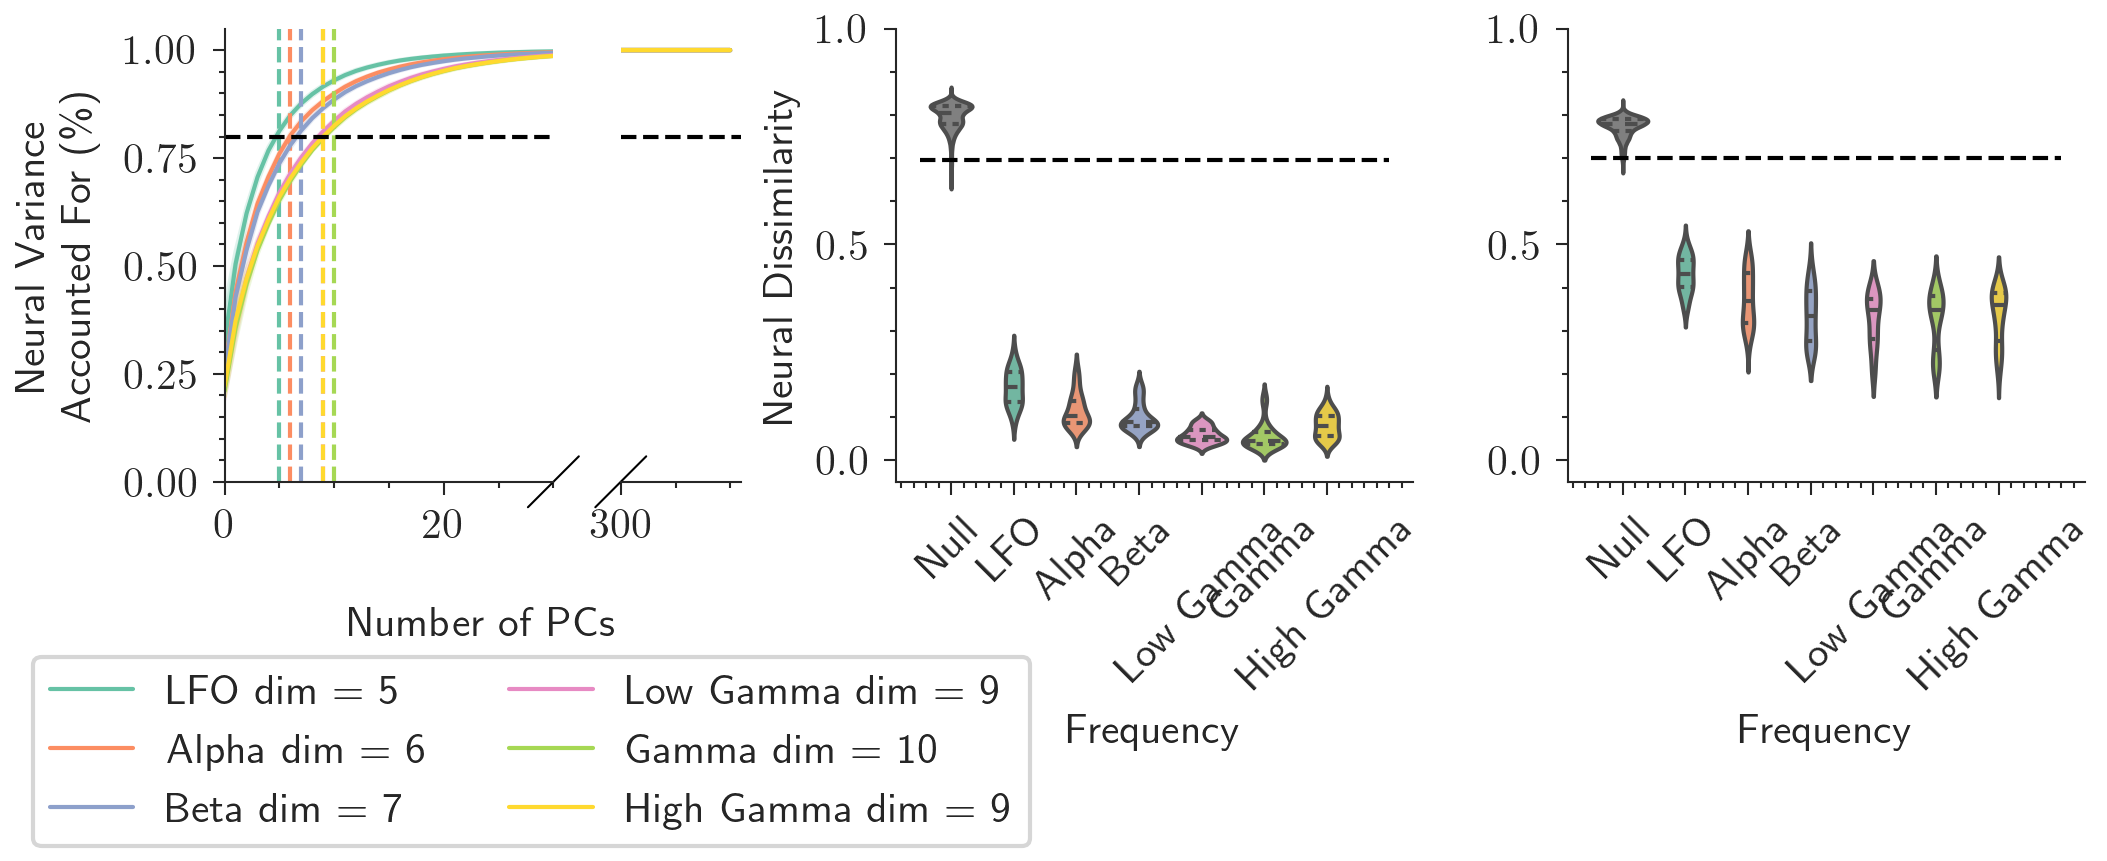

In [23]:
wspace = 0.3
fig, orig_axes = plt.subplots(1, 3, figsize=(8, 2), dpi=300)
plt.subplots_adjust(wspace=wspace, hspace=hspace)
orig_axes[0].axis('off')
sns.despine()
# plt.tight_layout()

axes = GridSpec(1, 3, figure=fig, wspace=wspace, hspace=hspace+0.1)
# axes.update(wspace=0.15, hspace=0.9)

figu.subplot_VAF(pca_manifolds_VAF_mean, 
            pca_manifolds_VAF_std, 
            list(freq_bands.keys()), 
            "A) Experimental Frequency\nBands", 
            freq_colors, 
            axes[0])

order = ["Null"]
order.extend(freq_bands.keys())
null_inds = cross_move_nd_df[cross_move_nd_df["Participant"] == "Null"].index
cross_move_nd_df.loc[null_inds, "Frequency"] = "Null"
sigf_val = mu.calc_sumed_significance(cross_move_nd_df)
print(sigf_val)
figu.plot_neural_dissimilarity(orig_axes[1], 
                          cross_move_nd_df, 
                          sigf_val, 
                          order, 
                          freq_colors, 
                          x="Frequency",)
orig_axes[1].set_yticks([0, 0.5, 1])
# orig_axes[1].set_title('B) Cross Movement', loc = 'left', y = 0.99)

sigf_val = mu.calc_sumed_significance(cross_pat_nd_df, null_col='Movement')
print(sigf_val)
figu.plot_neural_dissimilarity(orig_axes[2], 
                          cross_pat_nd_df, 
                          sigf_val, 
                          order, 
                          freq_colors, 
                          x="Frequency")
# orig_axes[2].set_yticklabels([])
orig_axes[2].set_yticks([0, 0.5, 1])
orig_axes[2].set_ylabel('')
# orig_axes[2].set_title('C) Cross Subject', loc = 'left', y = 0.99)

plt.savefig('/home/zsteineh/research_projects/NaturalisticNeuralManifolds/figures/saved_figures/supplement_exp_freq.svg', bbox_inches='tight', format='svg')
plt.show()

In [24]:
print("CROSS MOVEMENT STATS")
print("All Freqs")
print("mean:", cross_move_nd_df[cross_move_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].mean())
print("std:", cross_move_nd_df[cross_move_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].std())
print()
for freq in freq_bands.keys():
    print(freq)
    print("mean:", cross_move_nd_df[cross_move_nd_df['Frequency'] == freq]['Neural Dissimilarity'].mean())
    print("std:", cross_move_nd_df[cross_move_nd_df['Frequency'] == freq]['Neural Dissimilarity'].std())
    print()

CROSS MOVEMENT STATS
All Freqs
mean: 0.0963364860225799
std: 0.050008692147307014

LFO
mean: 0.16777379111877233
std: 0.04112671535385323

Alpha
mean: 0.11598303668501739


std: 0.03854527300765499

Beta
mean: 0.099907558793248
std: 0.03214696150988376

Low Gamma
mean: 0.05837879404485482
std: 0.01750587615071125

Gamma
mean: 0.05551020853821795
std: 0.02951284089696894

High Gamma
mean: 0.08046552695536952
std: 0.028810374701364844



In [25]:
print("CROSS PAT STATS")
print("All Freqs")
print("mean:", cross_pat_nd_df[cross_pat_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].mean())
print("std:", cross_pat_nd_df[cross_pat_nd_df['Frequency'] != 'Null']['Neural Dissimilarity'].std())
print()
for freq in freq_bands.keys():
    print(freq)
    print("mean:", cross_pat_nd_df[cross_pat_nd_df['Frequency'] == freq]['Neural Dissimilarity'].mean())
    print("std:", cross_pat_nd_df[cross_pat_nd_df['Frequency'] == freq]['Neural Dissimilarity'].std())
    print()

CROSS PAT STATS
All Freqs
mean: 0.3544525657132139
std: 0.07092150591820572

LFO
mean: 0.4306947866931723
std: 0.04212940175122937

Alpha
mean: 0.3737725536825849
std: 0.06243695077980336

Beta
mean: 0.33357614890214654
std: 0.06372740969421968

Low Gamma
mean: 0.3273937758047674
std: 0.061379160630229655

Gamma
mean: 0.3253842020171626
std: 0.0677766476321998

High Gamma
mean: 0.3358939271794499
std: 0.062281633676722604

